In [15]:
import pandas as pd
import numpy as np
np.random.seed(16)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [16]:
def preprocess(df):
    print('----------------------------------------------')
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Replace 0 values with the mean of the existing values
    df['Glucose'] = df['Glucose'].replace(0, np.nan)
    df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
    df['Insulin'] = df['Insulin'].replace(0, np.nan)
    df['BMI'] = df['BMI'].replace(0, np.nan)
    df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
    df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

    print('----------------------------------------------')
    print("After preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Standardization
    df_scaled = preprocessing.scale(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled['Outcome'] = df['Outcome']
    df = df_scaled


    return df

In [17]:
# look at the first 5 rows of the dataset
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
# Perform preprocessing and feature engineering
df = preprocess(df)

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


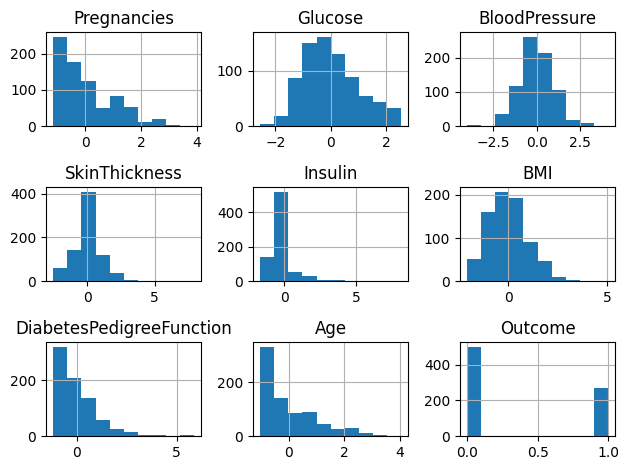

In [20]:
# show histogram
df.hist()
plt.tight_layout()
plt.show()

In [28]:
# Split the data into a training, validation and testing set
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

result = {}

In [50]:
# Build neural network in Keras
# model_1
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=8))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=100, verbose=True)

# Results - Accuracy
train_score_1 = model_1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_1[1]*100))
val_score_1 = model_1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (val_score_1[1]*100))
test_score_1 = model_1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_1[1]*100))

result['Model 1 Training Accuracy'] = round(train_score_1[1]*100, 2)
result['Model 1 Validation Accuracy'] = round(val_score_1[1]*100, 2)
result['Model 1 Testing Accuracy'] = round(test_score_1[1]*100, 2)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5519
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6578
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6578
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6558
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.6884
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7088
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7352
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7434
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7536
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7637
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8391
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8411
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8391
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8452
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8452
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8432
Epoch 89/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8493
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8473
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8452
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8473
Epoch 93/100


In [51]:
# Build neural network in Keras
# model_2
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_dim=8))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=100, verbose=True)

# Results - Accuracy
train_score_2 = model_2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_2[1]*100))
val_score_2 = model_2.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (val_score_2[1]*100))
test_score_2 = model_2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_2[1]*100))

result['Model 2 Training Accuracy'] = round(train_score_2[1]*100, 2)
result['Model 2 Validation Accuracy'] = round(val_score_2[1]*100, 2)
result['Model 2 Testing Accuracy'] = round(test_score_2[1]*100, 2)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6621 - accuracy: 0.6110
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6762
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.6986
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7210
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7495
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7637
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7760
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7862
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.7963
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7923
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9165
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9104
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9165
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.9145
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9063
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9206
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2143 - accuracy: 0.9185
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2107 - accuracy: 0.9145
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9165
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9185
Epoch 93/100


In [52]:
# Build neural network in Keras
# model 3
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=8))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=100, verbose=True)

# Results - Accuracy
train_score_3 = model_3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_3[1]*100))
val_score_3 = model_3.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (val_score_3[1]*100))
test_score_3 = model_3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_3[1]*100))

result['Model 3 Training Accuracy'] = round(train_score_3[1]*100, 2)
result['Model 3 Validation Accuracy'] = round(val_score_3[1]*100, 2)
result['Model 3 Testing Accuracy'] = round(test_score_3[1]*100, 2)

Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 0.6654 - accuracy: 0.6130
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7169
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7597
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7923
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7963
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8004
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8045
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8045
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8045
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8065
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9287
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9328
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9389
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9389
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9369
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9430
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9450
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9328
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9409
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9430
Epoch 93/100


In [53]:
# Build neural network in Keras
# model_4
model_4 = Sequential()
model_4.add(Dense(16, activation='sigmoid', input_dim=8))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.fit(X_train, y_train, epochs=100, verbose=True)

# Results - Accuracy
train_score_4 = model_4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_4[1]*100))
val_score_4 = model_4.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (val_score_4[1]*100))
test_score_4 = model_4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_4[1]*100))

result['Model 4 Training Accuracy'] = round(train_score_4[1]*100, 2)
result['Model 4 Validation Accuracy'] = round(val_score_4[1]*100, 2)
result['Model 4 Testing Accuracy'] = round(test_score_4[1]*100, 2)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6212
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6477
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6477
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6477
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.6477
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6477
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6477
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6477
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6477
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6477
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7943
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7923
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7963
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7923
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7943
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7943
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7943
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7923
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4431 - accuracy: 0.7923
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.7943
Epoch 93/100


In [54]:
# Build neural network in Keras
# model_5
model_5 = Sequential()
model_5.add(Dense(16, activation='sigmoid', input_dim=8))
model_5.add(Dense(32, activation='sigmoid'))
model_5.add(Dense(64, activation='sigmoid'))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_5.fit(X_train, y_train, epochs=100, verbose=True)

# Results - Accuracy
train_score_5 = model_5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_5[1]*100))
val_score_5 = model_5.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (val_score_5[1]*100))
test_score_5 = model_5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_5[1]*100))

result['Model 5 Training Accuracy'] = round(train_score_5[1]*100, 2)
result['Model 5 Validation Accuracy'] = round(val_score_5[1]*100, 2)
result['Model 5 Testing Accuracy'] = round(test_score_5[1]*100, 2)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6658 - accuracy: 0.6273
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6477
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6477
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6477
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6477
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.6477
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.6477
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.6477
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.6477
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6477
Epoch 11/

16/16 [==============================] - 0s 976us/step - loss: 0.4451 - accuracy: 0.7943
Epoch 83/100
16/16 [==============================] - 0s 997us/step - loss: 0.4450 - accuracy: 0.7902
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7902
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8004
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7882
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8024
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7923
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7862
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7923
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7882
Epoch 92/

In [55]:
# Build neural network in Keras
# model 6
model_6 = Sequential()
model_6.add(Dense(16, activation='sigmoid', input_dim=8))
model_6.add(Dense(32, activation='sigmoid'))
model_6.add(Dense(64, activation='sigmoid'))
model_6.add(Dense(128, activation='sigmoid'))
model_6.add(Dense(1, activation='sigmoid'))
model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_6.fit(X_train, y_train, epochs=100, verbose=True)

# Results - Accuracy
train_score_6 = model_6.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_6[1]*100))
val_score_6 = model_6.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (val_score_6[1]*100))
test_score_6 = model_6.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_6[1]*100))

result['Model 6 Training Accuracy'] = round(train_score_6[1]*100, 2)
result['Model 6 Validation Accuracy'] = round(val_score_6[1]*100, 2)
result['Model 6 Testing Accuracy'] = round(test_score_6[1]*100, 2)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6663 - accuracy: 0.6191
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6477
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6477
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6477
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6477
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6477
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6477
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6477
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6477
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6477
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8024
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7923
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8004
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7882
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7841
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7984
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7882
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7841
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7882
Epoch 92/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7882
Epoch 93/100


In [56]:
result

{'Model 1 Training Accuracy': 85.34,
 'Model 1 Validation Accuracy': 69.11,
 'Model 1 Testing Accuracy': 75.97,
 'Model 2 Training Accuracy': 92.87,
 'Model 2 Validation Accuracy': 66.67,
 'Model 2 Testing Accuracy': 70.13,
 'Model 3 Training Accuracy': 95.52,
 'Model 3 Validation Accuracy': 68.29,
 'Model 3 Testing Accuracy': 68.83,
 'Model 4 Training Accuracy': 79.43,
 'Model 4 Validation Accuracy': 74.8,
 'Model 4 Testing Accuracy': 75.97,
 'Model 6 Training Accuracy': 79.02,
 'Model 6 Validation Accuracy': 73.17,
 'Model 6 Testing Accuracy': 75.97,
 'Model 5 Training Accuracy': 78.62,
 'Model 5 Validation Accuracy': 74.8,
 'Model 5 Testing Accuracy': 75.97}

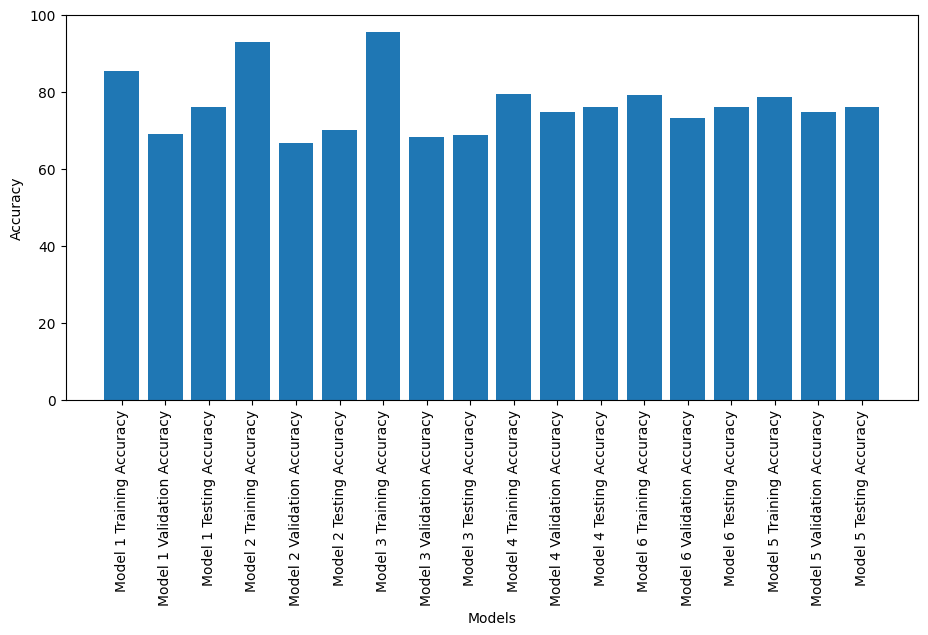

In [59]:
# plot result
names = list(result.keys())
values = list(result.values())

plt.figure(figsize=(11, 5))
plt.bar(range(len(result)), values, tick_label=names)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.ylim(0, 100.0)
plt.show()

5/5 [==============================] - 0s 2ms/step


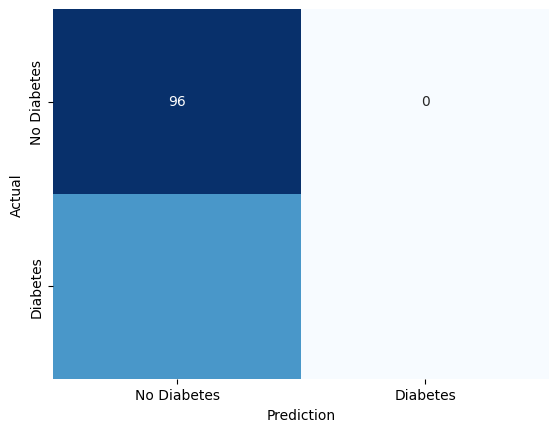

<Figure size 640x480 with 0 Axes>

In [29]:
# Results - Confusion Matrix
y_test_pred = np.argmax(model_1.predict(X_test), axis=-1)
#y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(
    c_matrix, annot=True,
    xticklabels=['No Diabetes', 'Diabetes'],
    yticklabels=['No Diabetes', 'Diabetes'],
    cbar=False, cmap='Blues'
)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

5/5 [==============================] - 0s 939us/step


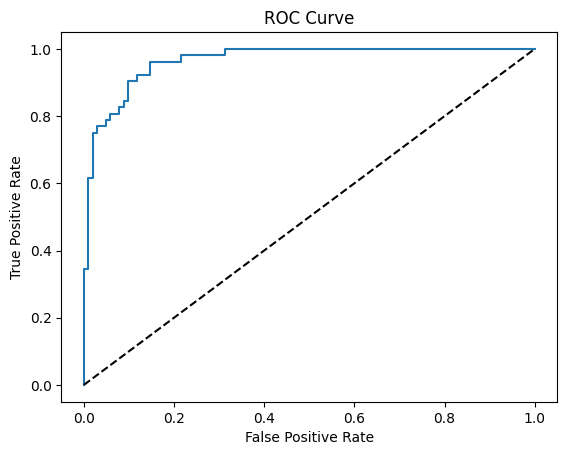

<Figure size 640x480 with 0 Axes>

In [86]:
# Results - ROC Curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)


plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()